    Таблица visits (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя
    
    Таблица orders (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка
    
    Таблица costs (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

    LTV -  общая сумма денег, которую один клиент в среднем приносит компании (выручка еа текущий день / размер когорты) (1, 3, 7, 14 дней)
    ROI - окупаемость LTV/САС
    САС - стоимость привлечения одного клиента ( Расход на рекламу / размер когорты )
    ARPU - средняя выручка с пользователя 
    ARPPU - средняя выручка с платящего пользователя
    удержание 
    CTR - показов рекламного баннера в клики называют(конверсия клики/показы)
    CR - переход пользователя от одного состояния в другое(конверсия)
    DAU - количество уникальных пользователей за день 
    WAU - количество уникальных пользователей за неделю 
    MAU - количество уникальных пользователей за месяц 
    ASL - Средняя продолжительность сессии 
    CPM -  стоимость тысячи показов рекламного объявления.
    RPM - доход за тысячу показов.
    СPC - оплата за каждого пользователя, кликнувшего на рекламное объявление, то есть перешедшего на сайт.
    CPL - оплата за каждого пользователя, оставившего свои контакты
    CPA - оплата за определённое действие, совершённое пользователем. Например, за покупку.

Загружаем библиотеки

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем таблицы

In [2]:
job = 'C:\\Users\\a.vechkanov\\Desktop\\Госты, Литература\\Остальное\\Data analitics\\Проекты\\Продуктовые метрики\\'
home = 'C:\\Users\\Александр\\OneDrive\\Рабочий стол\\Python\\ЯндексПрактикум\\Project\\Продуктовые метрики\\'
try:   
    visits = pd.read_csv(
        job+'visits_info_short.csv'
    )
    
    orders = pd.read_csv(
        job+'orders_info_short.csv'
    )
        
    costs = pd.read_csv(
        job+'costs_info_short.csv'
    )
    
except:
    visits = pd.read_csv(
        home+'visits_info_short.csv'
    )
    orders = pd.read_csv(
        home+'orders_info_short.csv'
    )
    costs = pd.read_csv(
        home+'costs_info_short.csv'
    )
    

Подготовим наши данные к работе

In [3]:
names = ['visits', 'orders', 'costs']
tables = [visits, orders, costs]
for table,name in zip(tables, names):
    print('ТАБЛИЦА: ',name)
    display(table.shape)
    display(table.sample(3))
    table.info()
    print('\n')

ТАБЛИЦА:  visits


(309901, 6)

,User Id,Region,Device,Channel,Session Start,Session End
226834,98630804492,UK,iPhone,lambdaMediaAds,2019-06-09 17:25:32,2019-06-09 17:51:10
219643,295795879965,Germany,PC,WahooNetBanner,2019-05-26 11:02:13,2019-05-26 11:51:55
22406,820357630215,United States,Android,TipTop,2019-05-24 11:57:22,2019-05-24 12:01:13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


ТАБЛИЦА:  orders


(40212, 3)

,User Id,Event Dt,Revenue
17874,123643365833,2019-09-14 00:03:38,4.99
34491,966689987328,2019-09-01 06:02:32,4.99
26818,967329450194,2019-10-26 00:38:25,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


ТАБЛИЦА:  costs


(1800, 3)

,dt,Channel,costs
1492,2019-06-22,WahooNetBanner,41.40
1421,2019-10-09,OppleCreativeMedia,12.25
1541,2019-08-10,WahooNetBanner,43.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB




Пропусков нет, проверим данные на дубликаты

In [4]:
for table in tables:
    print(table.duplicated().sum())

0
0
0


Приведем таблицы к удобному для работы виду 

In [5]:
visits.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

In [6]:
visits = visits.rename(
    columns = {
        visits.columns[0]:'user_id',
        visits.columns[1]:'region',
        visits.columns[2]:'device',
        visits.columns[3]:'channel',
        visits.columns[4]:'session_start',
        visits.columns[5]:'session_end'
    }
)

orders = orders.rename(
    columns = {
        orders.columns[0]:'user_id',
        orders.columns[1]:'event_dt',
        orders.columns[2]:'revenue',
    }
)

costs = costs.rename(
    columns = {
        costs.columns[0]:'dt',
        costs.columns[1]:'channel',
        costs.columns[2]:'costs',
    }
)

Посчитаем длину сессии пльзователей из таблицы visits

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

Преобразуем тип данных

In [8]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [9]:
visits['session_length'] = pd.to_datetime(visits['session_end']) - pd.to_datetime(visits['session_start'])

visits.query('user_id == 267068500935')

,user_id,region,device,channel,session_start,session_end,session_length
110558,267068500935,United States,iPhone,organic,2019-08-16 02:08:57,2019-08-16 02:16:38,0 days 00:07:41
111588,267068500935,United States,iPhone,organic,2019-08-17 13:27:23,2019-08-17 14:15:08,0 days 00:47:45
121264,267068500935,United States,iPhone,organic,2019-08-25 18:45:22,2019-08-25 18:47:31,0 days 00:02:09


    Создадим профиль пользователей
    id, channel, device, region, session start, month, dt, payer, costs, acquisition_cost

In [10]:
# выделяем первое песещение пользователя 
profiles = visits.pivot_table(
    index = 'user_id',
    values = ['session_start', 'channel', 'device', 'region'],
    aggfunc = 'first'
). reset_index().sort_values(by = 'session_start')

# выделяем месяц
profiles['month'] = profiles['session_start'].astype('datetime64[M]')
profiles['dt'] = profiles['session_start'].astype('datetime64[D]')

# является ли платящим(хоть раз платил) клиент или нет(пересечение в таблице orders)
profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique()) 

# посчитаем стоимость привлечения одного пользователя
acquisition_cost = profiles.pivot_table(index = ['dt','channel'], values = 'user_id', aggfunc = 'nunique').reset_index().merge(
        costs.pivot_table(index = ['dt','channel'], values = 'costs').reset_index(), 
        on = ['dt','channel'],
        how = 'left'
                      ).rename(columns = {'user_id':'count_user_id'})

acquisition_cost['acquisition_cost'] = acquisition_cost['costs']/acquisition_cost['count_user_id']

profiles = profiles.merge(acquisition_cost, on=['dt','channel'], how='left')

In [11]:
profiles.query('user_id == 329994900775')

,user_id,channel,device,region,session_start,month,dt,payer,count_user_id,costs,acquisition_cost
149712,329994900775,LeapBob,PC,UK,2019-10-27 18:17:40,2019-10-01,2019-10-27,True,58,12.81,0.220862


Рассмотрим наших пользователей по регионам

In [85]:
users_region = profiles.pivot_table(index='region', values='payer', aggfunc=['count', 'sum']).reset_index()
users_region['%_payer'] = round(users_region[('sum','payer')]/users_region[('count','payer')]*100, 1)
users_region['%_count_all'] = round(users_region[('count','payer')]/users_region[('count','payer')].sum()*100, 1)
users_region

,region,count,sum,%_payer,%_count_all
,,payer,payer,,
0,France,17450,663,3.8,11.6
1,Germany,14981,616,4.1,10.0
2,UK,17575,700,4.0,11.7
3,United States,100002,6902,6.9,66.7


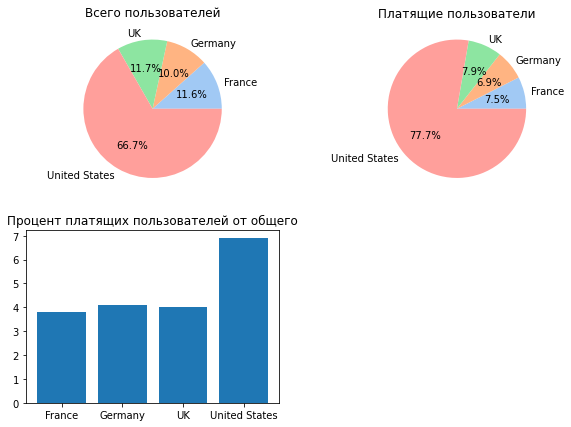

In [86]:
fig = plt.figure(figsize=(10,7))

colors = sns.color_palette('pastel')

ax1 = fig.add_subplot(2,2,1)
plt.pie(
    x = users_region['%_count_all'],
    labels = users_region['region'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Всего пользователей')

ax2 = fig.add_subplot(2,2,2)
plt.pie(
    x = users_region[('sum','payer')],
    labels = users_region['region'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Платящие пользователи')

ax2 = fig.add_subplot(2,2,3)
plt.bar(
    x = users_region['region'],
    height = users_region['%_payer']
)
plt.title('Процент платящих пользователей от общего')

plt.show()


    Вывод 
    66% клиентов приходится на США 
    11,5% на бритов и французов
    10% на немцев
    
    из них платящих
    77% процентов сша
    7,6% на бритов и французов
    7% на немцев
    
    7% переходят в платящие в сша
    4% - бриты, французы, немцы

In [117]:
z = profiles.pivot_table(index=['region', 'device', 'channel', 'month'], values='payer', aggfunc=['count', 'sum']).reset_index()
z['%_payer'] = round(z[('sum','payer')]/z[('count','payer')]*100, 1)
z['%_count_all'] = round(z[('count','payer')]/z[('count','payer')].sum()*100, 1)
z = z.rename(columns={z.columns[5]:'sum_payer'})
z.columns
z.head()

,region,device,channel,month,count,sum,%_payer,%_count_all
,,,,,payer,payer,,
0,France,Android,AdNonSense,2019-05-01,123,12,9.8,0.1
1,France,Android,AdNonSense,2019-06-01,61,10,16.4,0.0
2,France,Android,AdNonSense,2019-07-01,56,4,7.1,0.0
3,France,Android,AdNonSense,2019-08-01,64,7,10.9,0.0
4,France,Android,AdNonSense,2019-09-01,44,5,11.4,0.0


In [111]:
z.columns[5]

('sum', 'payer')

In [113]:
z.groupby('region')[('sum', 'payer')].sum()

C:\Users\A01C0~1.VEC\AppData\Local\Temp/ipykernel_8964/4162111682.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  z.groupby('region')[('sum', 'payer')].sum()


TypeError: other must be a MultiIndex or a list of tuples

C:\Users\A01C0~1.VEC\AppData\Local\Temp/ipykernel_8964/2686897840.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = z.groupby('region')[('sum','payer')].sum(),


TypeError: other must be a MultiIndex or a list of tuples

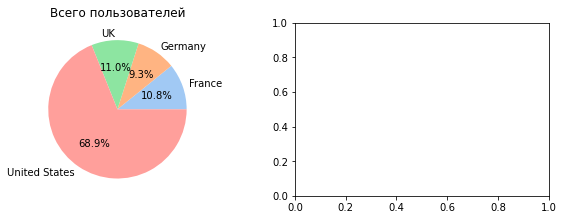

In [106]:
fig = plt.figure(figsize=(10,7))

colors = sns.color_palette('pastel')

ax1 = fig.add_subplot(2,2,1)
plt.pie(
    x = z.groupby('region')['%_count_all'].sum(),
    labels = z['region'].unique(),
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Всего пользователей')

ax2 = fig.add_subplot(2,2,2)
plt.pie(
    x = z.groupby('region')[('sum','payer')].sum(),
    labels = z['region'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Платящие пользователи')


plt.show()